# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
numbermouse = data['Mouse ID'].drop_duplicates()
numbermouse.count()

249

In [3]:
data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
# reorganizing my columns to match the order of the columns in the answer template
data = data[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']]

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicatemice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedata = data.loc[data['Mouse ID'] == 'g989',:]
mousedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dataclean = data[data['Mouse ID']!= 'g989']

In [8]:
# Checking the number of mice in the clean DataFrame.
dataclean['Mouse ID'].drop_duplicates().count()

248

In [9]:
dataclean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

datamean = dataclean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
datamedian = dataclean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
datavar = dataclean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
datastd = dataclean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
datasem = dataclean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

datasummary = pd.DataFrame({
    'Mean Tumor Volume': datamean,
    'Median Tumor Volume': datamedian,
    'Tumor Volume Variance': datavar,
    'Tumor Volume Std. Dev.': datastd,
    'Tumor Volume Std. Err.': datasem})

datasummary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2 = dataclean.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

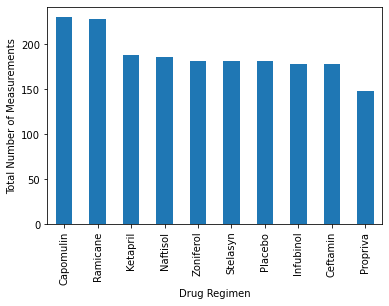

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
miceperdrug = dataclean.groupby('Drug Regimen').count()['Tumor Volume (mm3)'].sort_values(ascending=False)
miceperdrug.plot.bar(x='Drug Regimen')
plt.ylabel('Total Number of Measurements')
plt.show()

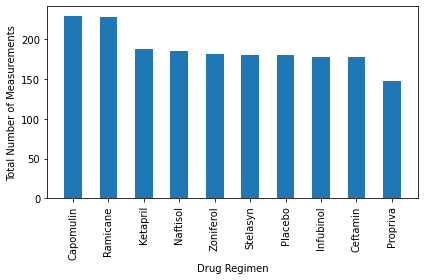

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
# make list so you can use the values for x axis
xaxis = np.arange(len(miceperdrug))
plt.bar(xaxis, miceperdrug, width=0.5)
plt.xticks(xaxis, miceperdrug.index, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')
plt.tight_layout()
plt.show()

In [14]:
malefemale = dataclean.Sex.value_counts(normalize=True)
malefemale

Male      0.509574
Female    0.490426
Name: Sex, dtype: float64

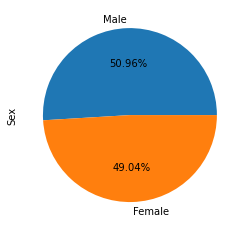

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
malefemale.plot.pie(autopct='%.2f%%')
plt.show()

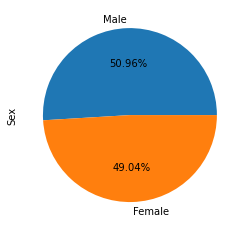

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(malefemale, labels=malefemale.index, autopct='%.2f%%');
plt.ylabel('Sex');

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxdata = pd.DataFrame(dataclean.groupby('Mouse ID')['Timepoint'].max())
maxdata = maxdata.rename(columns={'Timepoint':'Max Timepoint'})
maxdata

# Merge this group df with the original dataframe to get the tumor volume at the last timep
maxdataclean = pd.merge(dataclean, maxdata, on='Mouse ID')
maxdataclean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,k403,0,45.000000,0,Ramicane,Male,21,16,45
1,k403,5,38.825898,0,Ramicane,Male,21,16,45
2,k403,10,35.014271,1,Ramicane,Male,21,16,45
3,k403,15,34.223992,1,Ramicane,Male,21,16,45
4,k403,20,32.997729,1,Ramicane,Male,21,16,45
...,...,...,...,...,...,...,...,...,...
1875,z969,25,63.145652,2,Naftisol,Male,9,30,45
1876,z969,30,65.841013,3,Naftisol,Male,9,30,45
1877,z969,35,69.176246,4,Naftisol,Male,9,30,45
1878,z969,40,70.314904,4,Naftisol,Male,9,30,45


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drugsfinalvolume = []

# for each drug in list, if max time in TimePoint is equal to Max Timepoint column, get final volume
for drug in drugs:
    drugdf = maxdataclean.loc[maxdataclean['Drug Regimen']== drug] #filter rows with drugs
    finalvolumedf = drugdf.loc[drugdf['Timepoint'] == drugdf['Max Timepoint']] #filter rows with matching tp
    finalvolume = finalvolumedf['Tumor Volume (mm3)'] # get volume
    drugsfinalvolume.append(finalvolume) # append volume to list to be used for boxplot
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    quartiles = finalvolumedf['Tumor Volume (mm3)'].quantile([0.25, 0.50, 0.75])    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
# # Determine outliers using upper and lower bounds
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    outlierslower = finalvolume.loc[finalvolumedf['Tumor Volume (mm3)'] <= lowerbound].count()
    outliersupper = finalvolume.loc[finalvolumedf['Tumor Volume (mm3)'] >= upperbound].count()
    outlierscounttotal = outlierslower + outliersupper
# print out all values    
    print(f"The lower quartile of {drug} tumor volume is: {lowerq}.")
    print(f"The interquartile of {drug} tumor volume is: {iqr}.")
    print(f"The upper quartile of {drug} tumor volume is: {upperq}.")
    print(f"Values below {lowerbound} are outliers.")
    print(f"Values above {upperbound} are outliers.")
    print(f"There is a total of {outlierscounttotal} outlier.")
    print('-----------------------------------------------------')

The lower quartile of Capomulin tumor volume is: 32.37735684.
The interquartile of Capomulin tumor volume is: 7.781863460000004.
The upper quartile of Capomulin tumor volume is: 40.1592203.
Values below 20.70456164999999 are outliers.
Values above 51.83201549 are outliers.
There is a total of 0 outlier.
-----------------------------------------------------
The lower quartile of Ramicane tumor volume is: 31.56046955.
The interquartile of Ramicane tumor volume is: 9.098536719999998.
The upper quartile of Ramicane tumor volume is: 40.65900627.
Values below 17.912664470000003 are outliers.
Values above 54.30681135 are outliers.
There is a total of 0 outlier.
-----------------------------------------------------
The lower quartile of Infubinol tumor volume is: 54.04860769.
The interquartile of Infubinol tumor volume is: 11.477135160000003.
The upper quartile of Infubinol tumor volume is: 65.52574285.
Values below 36.83290494999999 are outliers.
Values above 82.74144559000001 are outliers.
T

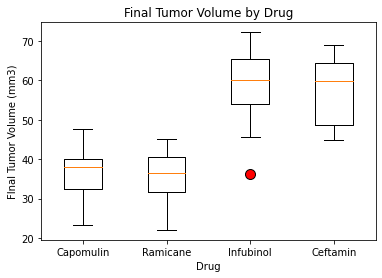

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(markersize=10, markerfacecolor='r')
plt.boxplot(drugsfinalvolume, flierprops=flierprops);
plt.title('Final Tumor Volume by Drug')
plt.ylabel('FInal Tumor Volume (mm3)')
plt.xticks([1,2,3,4], drugs)
plt.xlabel('Drug');
plt.show()

## Line and Scatter Plots

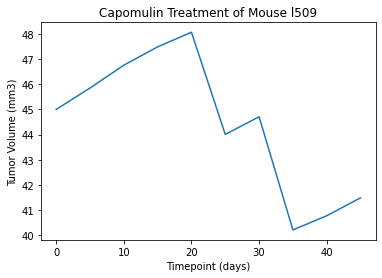

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# filter all mice treated with Capomulin
mouse = dataclean.loc[dataclean['Drug Regimen']=='Capomulin']
# pick and filter for mouse l509
l509 = mouse.loc[mouse['Mouse ID']== 'l509']
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Treatment of Mouse l509")
plt.plot(l509.Timepoint, l509['Tumor Volume (mm3)']);

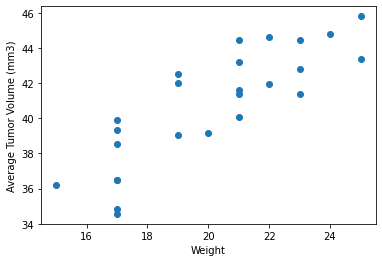

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# filter for Capomulin
capomulindf = data.loc[data['Drug Regimen']=='Capomulin']
# get average tumor vol for each mouse
avgvoldf = pd.DataFrame(capomulindf.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})
# merge with previous df
avgvolcapo = pd.merge(capomulindf, avgvoldf, on='Mouse ID')
avgvolcapodf = avgvolcapo[['Avg Tumor Volume (mm3)', 'Weight (g)']].drop_duplicates()

# create scatter plot
plt.scatter(avgvolcapodf['Weight (g)'], avgvolcapodf['Avg Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)');

## Correlation and Regression

The correlation coefficient between mouse weight and 
average tumor volume for the Capomulin treatment is: 0.84.


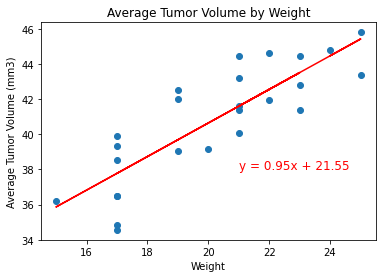

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x = avgvolcapodf['Weight (g)']
y = avgvolcapodf['Avg Tumor Volume (mm3)']

correlation = st.pearsonr(x,y)
print(f"""The correlation coefficient between mouse weight and 
average tumor volume for the Capomulin treatment is: {round(correlation[0],2)}.""")

# calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
# the line to apply on top of graph later
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.title('Average Tumor Volume by Weight')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(21,38),fontsize=12,color="red")
plt.show()